Практична робота №3
Завдання 1
Авдєєва Серафима ФІТ 4-4

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# 1: Зчитування CSV файлу
data = pd.read_csv("E:/University/виконані завдання/МН виконані/Global YouTube Statistics.csv", encoding='unicode_escape')

In [13]:
# 2: Виведення перших п'яти рядків
data_h5 = data.head(5)
print(data_h5)

   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  ...  subscribers_for_last_30_days  \
0           IN          Music  ...                     2000000.0   
1           US  

In [14]:
# 3: Виведення розмірів датасету
print("Розмір датасету:", data.shape)

Розмір датасету: (995, 28)


In [15]:
# 4: Перевірка пропусків та заміна їх на NaN
print("Кількість пропусків у кожному стовпці:\n", data.isna().sum())
print(data.dtypes)

Кількість пропусків у кожному стовпці:
 rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month       

In [16]:
# Заміна пропусків на NaN і зміна типу даних на числовий
data = data.fillna(np.nan)
for column in data.columns:
    try:
        column = pd.to_numeric(column)
    except:
        pass
print(data.dtypes)

rank                                         int64
Youtuber                                    object
subscribers                                  int64
video views                                float64
category                                    object
Title                                       object
uploads                                      int64
Country                                     object
Abbreviation                                object
channel_type                                object
video_views_rank                           float64
country_rank                               float64
channel_type_rank                          float64
video_views_for_the_last_30_days           float64
lowest_monthly_earnings                    float64
highest_monthly_earnings                   float64
lowest_yearly_earnings                     float64
highest_yearly_earnings                    float64
subscribers_for_last_30_days               float64
created_year                   

In [17]:
# 5. Заміна комірок з пропущеними значеннями на середні за стовпцем
for column in data.columns:
    try:
        data[column] = data[column].fillna(data[column].mean())
    except:
        pass
    if np.issubdtype(data[column].dtype, np.int64):
        data[column] = data[column].astype(float)
                             
print(data.dtypes)

rank                                       float64
Youtuber                                    object
subscribers                                float64
video views                                float64
category                                    object
Title                                       object
uploads                                    float64
Country                                     object
Abbreviation                                object
channel_type                                object
video_views_rank                           float64
country_rank                               float64
channel_type_rank                          float64
video_views_for_the_last_30_days           float64
lowest_monthly_earnings                    float64
highest_monthly_earnings                   float64
lowest_yearly_earnings                     float64
highest_yearly_earnings                    float64
subscribers_for_last_30_days               float64
created_year                   

In [18]:
# 6. Перевірка кількості пропусків
print("Кількість пропусків у кожному стовпці:\n", data.isna().sum())
#print("\n------DATA------", data)

Кількість пропусків у кожному стовпці:
 rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             0
country_rank                                 0
channel_type_rank                            0
video_views_for_the_last_30_days             0
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days                 0
created_year                                 0
created_month       

In [19]:
# 7: Кількість унікальних країн в колонці "Country"
unique_countries = data['Country'].nunique()
print("Кількість унікальних країн: ", unique_countries)

Кількість унікальних країн:  49


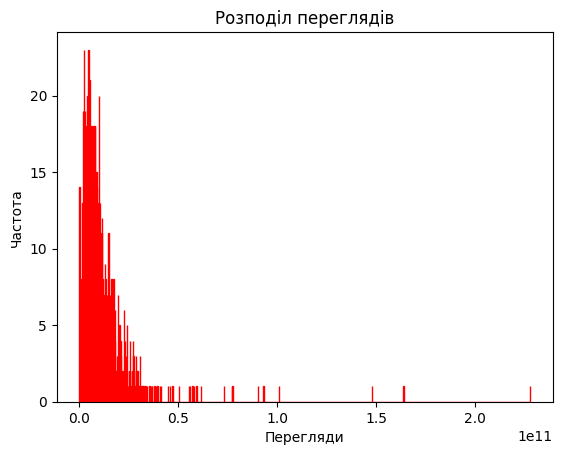

In [22]:
# 8: Побудова гістограми розподілу переглядів

num_els = len(data['video views'])
data['video views'].plot(kind='hist', bins=int(num_els), edgecolor='red')
plt.title('Розподіл переглядів')
plt.xlabel('Перегляди')
plt.ylabel('Частота')
plt.show()

In [24]:
# 9: Визначення максимальної, мінімальної та середньої кількості переглядів
max_views = data['video views'].max()
min_views = data['video views'].min()
mean_views = data['video views'].mean()
print("Максимальна кількість переглядів:", max_views)
print("Мінімальна кількість переглядів:", min_views)
print("Середня кількість переглядів:", mean_views)


Максимальна кількість переглядів: 228000000000.0
Мінімальна кількість переглядів: 0.0
Середня кількість переглядів: 11039537052.03819


In [26]:
# 10: Знаходження країни з найбільшою кількістю відео
country_counts = data['Country'].value_counts()
most_uploads_country = country_counts.idxmax()
print("Країна з найбільшою кількістю відео на YouTube: ", most_uploads_country)

Країна з найбільшою кількістю відео на YouTube:  United States


In [28]:
# Крок 11: Знаходження каналу з найбільшою та найменшою кількістю завантажень uploads
video_with_most_uploads = data[data['uploads'] == data['uploads'].max()]['Title'].values[0]
video_with_least_uploads = data[data['uploads'] == data['uploads'].min()]['Title'].values[0]
print("Канал з найбільшою кількістю завантажень:", video_with_most_uploads)
print("Канал з найменшою кількістю завантажень:", video_with_least_uploads)

Канал з найбільшою кількістю завантажень: ABP NEWS
Канал з найменшою кількістю завантажень: Music
